# Random Forest

## import dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# 1. Load Dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 2. Exploratory Data Analysis (EDA)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


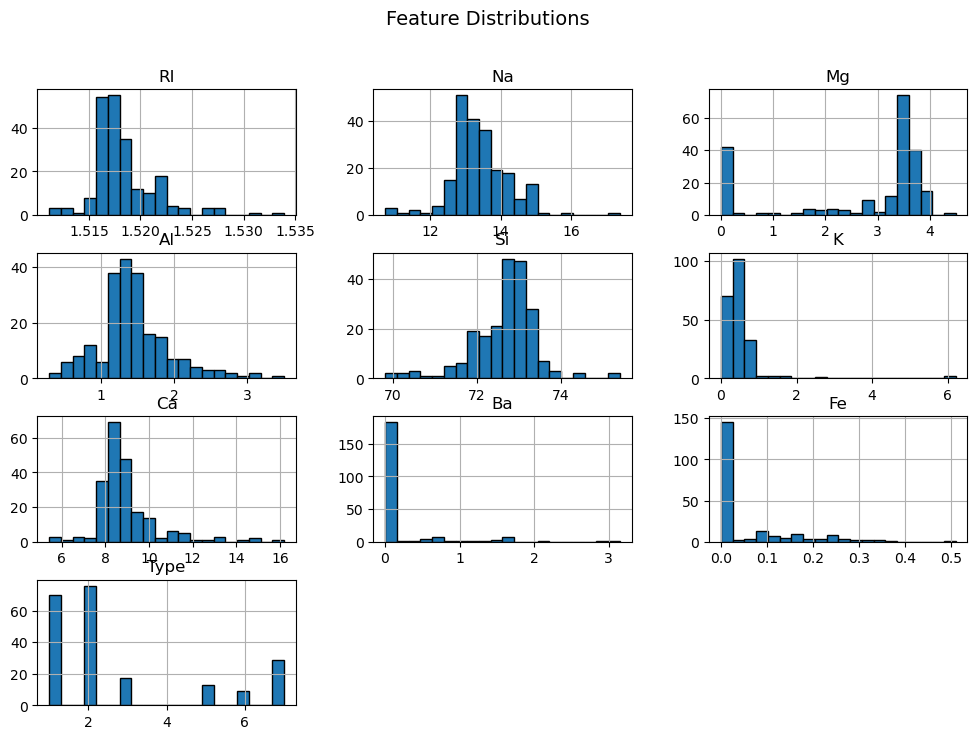

In [16]:
# Visualizing feature distributions
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

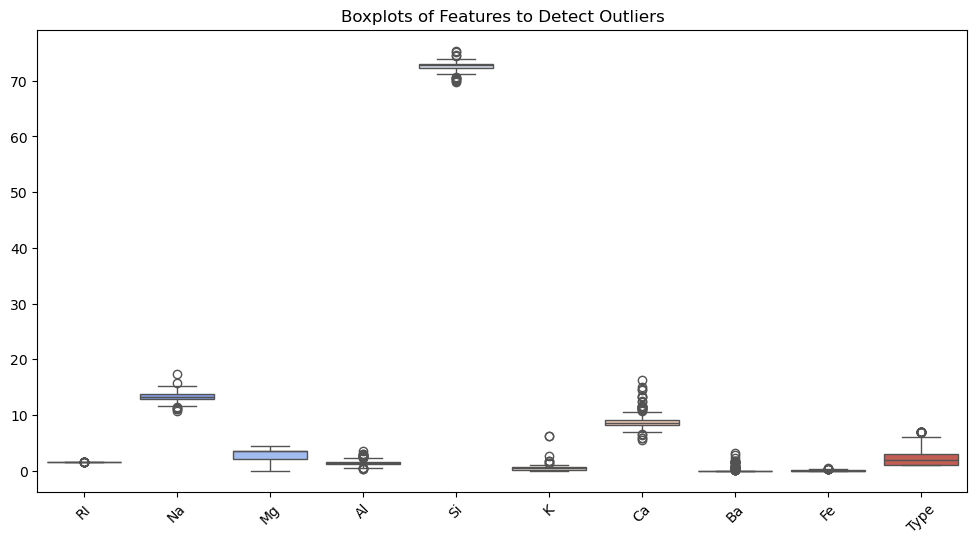

In [18]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplots of Features to Detect Outliers")
plt.show()

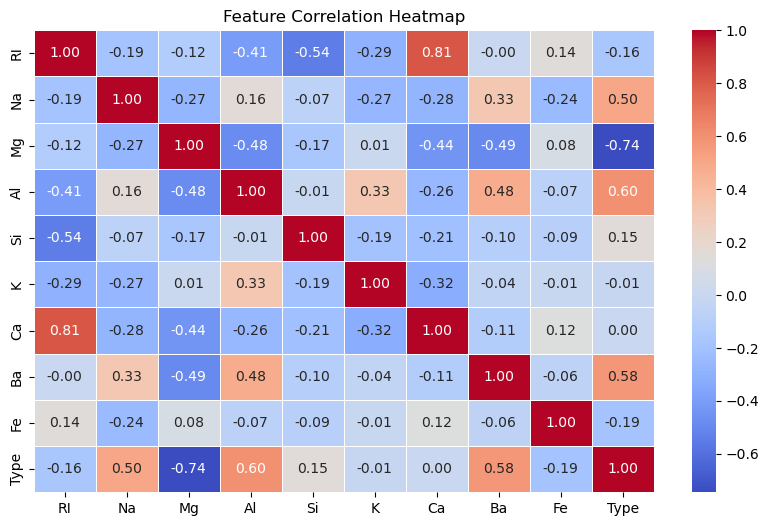

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Data Preprocessing

In [23]:
# Train-test split and feature scaling
X = df.drop(columns=["Type"])
y = df["Type"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Random Forest Model Implementation

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.813953488372093
Random Forest Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



# 5. Bagging and Boosting Methods

In [31]:
# Bagging Model
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.7906976744186046


In [33]:
# AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.5348837209302325


C:\Users\dnyan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [35]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.813953488372093


# Interview Question

### 1. Explain Bagging and Boosting methods. How is it different from each other.

1. **Bagging vs. Boosting:**  
   - **Bagging (Bootstrap Aggregation):**  
     - Uses multiple subsets of data (randomly sampled with replacement).  
     - Models are trained independently and their results are averaged.  
     - Reduces variance, prevents overfitting.  
   - **Boosting:**  
     - Models are trained sequentially, each correcting the previous model's errors.  
     - Assigns higher weights to misclassified samples.  
     - Reduces bias, improves accuracy.  

### 2. Explain how to handle imbalance in the data.

2. Handling Imbalance in Data:  
   - **Resampling Techniques:** Oversampling (SMOTE, ADASYN) or Undersampling.  
   - **Class Weights:** Adjusting model weights to penalize the minority class less.  
   - **Data Augmentation:** Creating synthetic samples.  
   - **Evaluation Metrics:** Use precision, recall, and F1-score instead of accuracy.